## Import Dependencies and Pretrained Model

In [3]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import cv2


In [4]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

## Preprocessed Image and Load

In [5]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [25]:
content_image = load_image('/content/lion-1.jpg')
style_image = load_image('/content/waves.jpeg')

## Visualize Output

In [26]:
content_image.shape

TensorShape([1, 801, 800, 3])

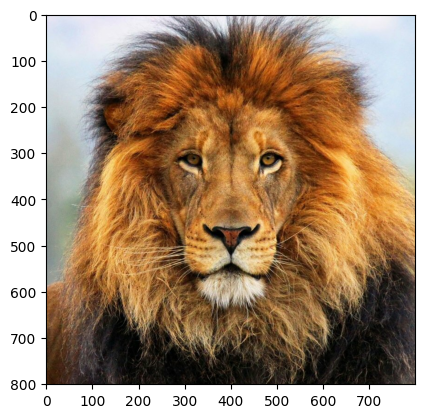

In [27]:
plt.imshow(np.squeeze(content_image))
plt.show()


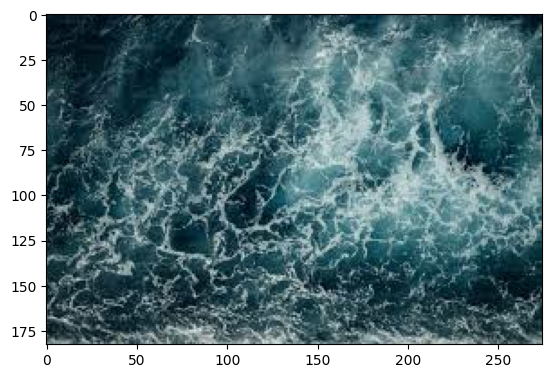

In [28]:
plt.imshow(np.squeeze(style_image))
plt.show()

## Stylize Image

In [30]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

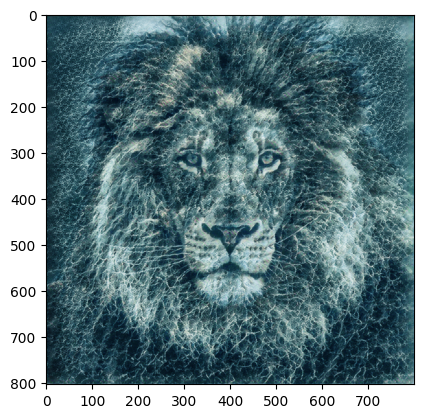

In [31]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [17]:
cv2.imwrite('stylized_image.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True